In [1]:
import pandas as pd
import numpy as np
import datetime
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import os
import xarray as xr
import cmaps
import cmocean
import xesmf as xe
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import regionmask
# mask out land region
land = regionmask.defined_regions.natural_earth.land_110

import netCDF4 as nc4
from netCDF4 import Dataset

import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['figure.figsize'] = (10, 6)
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

figsize=(10,6)

import rum

In [2]:
fdir_ATom = "/import/GREENING/tzhao/ATom/"
fdir_ATom_Planeflight = "/import/GREENING/tzhao/planeflight_2016/nest08_merra2_2x25_tropchem/"

jndirGC = "/import/GREENING/tzhao/jndata/GEOS-Chem/"
H_b_gc = xr.open_dataarray(jndirGC+"H_b_gc.nc", engine="netcdf4")

In [35]:
##############   read data   ###############

# load ATfrom rum
ATom_VOC_da = rum.ATom.load_ATom_VOCs_AK()

# load GC ATom
ATom_GC_VOC_da = rum.ATom.load_GC_ATom_VOCs_AK()

In [36]:
# calculate H from pressure        

ATom_GC_H_b_gc = np.array([])
for i in ATom_GC_VOC_da["GMAO_PRES"].values:
    if ~np.isnan(i):
        ATom_GC_H_b_gc = np.append(ATom_GC_H_b_gc,  44330 * (1 - (i/1013.25)**(1/5.255) )*1e-3 )
    else:
        ATom_GC_H_b_gc = np.append(ATom_GC_H_b_gc, i)

TOGA 326.29411764705884< 2km HCHO, ATom
WAS 404.77854609929085< 2km HCHO, ATom
TOGA 282.57142857142856 3-6km HCHO, ATom
WAS 218.620921985815583-6km HCHO, ATom
TOGA 211.91176470588235 6-10 km HCHO, ATom
WAS 88.519216016909436-10 km HCHO, ATom
TOGA 28.091176470588238< 2km Isoprene, ATom
WAS 82.0< 2km Isoprene, ATom
TOGA 0.0 3-6km Isoprene, ATom
WAS 0.03-6km Isoprene, ATom
TOGA 0.0 6-10 km Isoprene, ATom
WAS 0.06-10 km Isoprene, ATom
TOGA 1.4120588235294116< 2km Monoterpenes, ATom
WAS 6.645161290322581< 2km Monoterpenes, ATom
TOGA 0.0 3-6km Monoterpenes, ATom
WAS 0.088235294117647063-6km Monoterpenes, ATom
TOGA 0.0 6-10 km Monoterpenes, ATom
WAS 0.36-10 km Monoterpenes, ATom
TOGA 38.04117647058824< 2km MVK+MACR, ATom
WAS 38.04117647058824< 2km MVK+MACR, ATom
TOGA 2.5928571428571425 3-6km MVK+MACR, ATom
WAS 2.59285714285714253-6km MVK+MACR, ATom
TOGA 0.11372549019607843 6-10 km MVK+MACR, ATom
WAS 0.113725490196078436-10 km MVK+MACR, ATom
HCHO, GEOS-Chem  430.72498269116903 <2km
HCHO, GEOS-

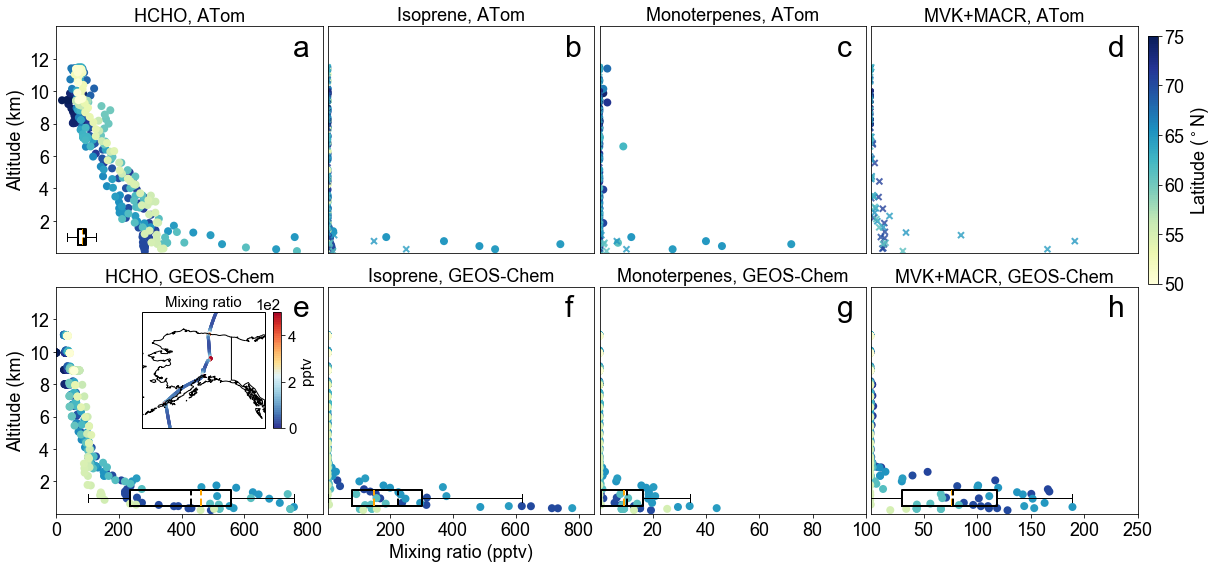

In [38]:
# pro plot


#   Plot:  H vs Conc

mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

str_ipanelindex = ["a","a","b",'c','d','e','f','g','h','i','j','k','l']

####      ATom     #####

var = [ATom_VOC_da["HCHO_pptv"],  ATom_VOC_da["ISOP_pptv"],  ATom_VOC_da["alpha-pinene"]+ATom_VOC_da["beta-pinene"],\
      ATom_VOC_da["MVK_TOGA"]+ATom_VOC_da["MAC_TOGA"]]

var_toga = [ATom_VOC_da["CH2O_TOGA"],  ATom_VOC_da["Isoprene_TOGA"],  ATom_VOC_da["aPinene_TOGA"]+ATom_VOC_da["bPineneMyrcene_TOGA"],\
      ATom_VOC_da["MVK_TOGA"]+ATom_VOC_da["MAC_TOGA"]]
alpha_was = [1,1,1,0]
alpha_toga = [0,0.8,0.8,0.8]

# titlenames = ["HCHO","Isoprene","Monoterpenes"]
titlenames = ["HCHO, ATom","Isoprene, ATom",'Monoterpenes, ATom',"MVK+MACR, ATom"]
xlabelnames = ["","Mixing ratio (pptv)",""]
xlims = [[0,850],[1,850],[0.1,100],[1,250]]

vmin = 50
vmax = 75
cmap = cmaps.MPL_YlGnBu
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='k',
                                        facecolor='none')
rows = 2
cols = 4


figsize=(4*cols,4*rows)
fig = plt.figure(figsize=figsize)
i = 1
for ii in range(0,len(var)):
    
#     tmp = np.nanmean(var[ii],3)   # averaged by lon
#     [it,ilev,ilat] = np.where(np.isnan(tmp)==0)

#     tmp_h = H_b_gc[ilev].where(H_b_gc[ilev]<2)
#     isurflev = np.where(np.isnan(tmp_h)==0)


    # plot
    ax = fig.add_subplot(rows,cols,i, aspect='auto')
    im=ax.scatter(var[ii] ,ATom_VOC_da["alt"]/1e3,  c=ATom_VOC_da["lat"] ,alpha=alpha_was[ii], lw=2,cmap=cmap,norm=norm)
    im2=ax.scatter(var_toga[ii] ,ATom_VOC_da["alt"]/1e3 ,c=ATom_VOC_da["lat"], marker='x',alpha=alpha_toga[ii], lw=2,cmap=cmap,norm=norm)
    
    # remove nan
    tmp = var_toga[ii][ATom_VOC_da["alt"]<=(2.0e3)].values
    tmp = tmp[~np.isnan(tmp)]
    print( "TOGA "+ str( np.nanmean(tmp) )+ "< 2km"+" "+titlenames[ii])
    
    # remove nan
    tmp = var[ii][ATom_VOC_da["alt"]<=(2.0e3)].values
    tmp = tmp[~np.isnan(tmp)]
    print( "WAS "+ str( np.nanmean(tmp) )+ "< 2km"+" "+titlenames[ii])
    
        # remove nan
    tmp = var_toga[ii][(ATom_VOC_da["alt"]<=(6.0e3))&(ATom_VOC_da["alt"]>=(3.0e3))].values
    tmp = tmp[~np.isnan(tmp)]
    print( "TOGA "+ str( np.nanmean(tmp) )+ " 3-6km"+" "+titlenames[ii])
    
    # remove nan
    tmp = var[ii][(ATom_VOC_da["alt"]<=(6.0e3))&(ATom_VOC_da["alt"]>=(3.0e3))].values
    tmp = tmp[~np.isnan(tmp)]
    print( "WAS "+ str( np.nanmean(tmp) )+ "3-6km"+" "+titlenames[ii])
    
        # remove nan
    tmp = var_toga[ii][(ATom_VOC_da["alt"]<=(10.0e3))&(ATom_VOC_da["alt"]>=(6.0e3))].values
    tmp = tmp[~np.isnan(tmp)]
    print( "TOGA "+ str( np.nanmean(tmp) )+ " 6-10 km"+" "+titlenames[ii])
    
    # remove nan
    tmp = var[ii][(ATom_VOC_da["alt"]<=(10.0e3))&(ATom_VOC_da["alt"]>=(6.0e3))].values
    tmp = tmp[~np.isnan(tmp)]
    print( "WAS "+ str( np.nanmean(tmp) )+ "6-10 km"+" "+titlenames[ii])
    
    if ii==0:
        ax.boxplot( tmp , vert=False,showmeans=True ,\
                  patch_artist = False ,meanline=True, widths=1,\
                   medianprops = {'linestyle':'--','color':'orange','linewidth':2},boxprops = {'color':'black','linewidth':2},\
                   meanprops = {'color':'black','linestyle':'--','linewidth':2},\
                   flierprops={'marker': 'o', 'markersize': 0, 'markerfacecolor': 'fuchsia'}
                  )
    
    y_ticks = [2,4,6,8,10,12]
    plt.ylim([0,14])
    plt.xlim(xlims[ii])
    
#     plt.xlabel(xlabelnames[ii])
    plt.title(titlenames[ii])
    ax.annotate( str_ipanelindex[i], xy=(0.89, 0.87), xycoords="axes fraction", fontweight='bold', fontsize = 30 )
    plt.xticks([])
    
    if i==1:
        plt.ylabel('Altitude (km)')
        plt.yticks(y_ticks, y_ticks)
    else:
        plt.yticks([])
        
#     if i==2:
#         ax.annotate( "ATom-1", xy=(0.1, 0.87), xycoords="axes fraction", fontweight='bold', fontsize = 30 )
    
    fig.tight_layout()#调整整体空白 
    plt.subplots_adjust(wspace =0.01, hspace =0.15)#调整子图间距
    i+=1

############################################################################

var = [ATom_GC_VOC_da["CH2O"],  ATom_GC_VOC_da["ISOP"],  ATom_GC_VOC_da["MTPA"],\
      ATom_GC_VOC_da["MVK"]+ATom_GC_VOC_da["MACR"]]

titlenames = ["HCHO, GEOS-Chem","Isoprene, GEOS-Chem","Monoterpenes, GEOS-Chem","MVK+MACR, GEOS-Chem"]
xlabelnames = ["","Mixing ratio (pptv)","",""]

vmin = 50
vmax = 75

i = 5
for ii in range(0,len(var)):


    # plot
    ax = fig.add_subplot(rows,cols,i, aspect='auto')
    tmp = var[ii]/(ATom_GC_VOC_da["GMAO_PRES"]*100/ATom_GC_VOC_da["GMAO_TEMP"]/1.38 * 1e5)
    im=ax.scatter( tmp , ATom_GC_H_b_gc,  c=ATom_GC_VOC_da["LAT"] ,lw=2,cmap=cmap,norm=norm)

    ax.boxplot( tmp[ATom_GC_H_b_gc < 2 ] , vert=False,showmeans=True ,\
              patch_artist = False ,meanline=True, widths=1,\
               medianprops = {'linestyle':'--','color':'orange','linewidth':2},boxprops = {'color':'black','linewidth':2},\
               meanprops = {'color':'black','linestyle':'--','linewidth':2},\
               flierprops={'marker': 'o', 'markersize': 0, 'markerfacecolor': 'fuchsia'}
              )
    print(titlenames[ii] + "  "+str(np.nanmean(tmp[ATom_GC_H_b_gc < 2 ]))+" <2km")
    print(titlenames[ii] + "  "+str(np.nanmean(tmp[(ATom_GC_H_b_gc >=3)&(ATom_GC_H_b_gc <6) ]))+" 3-6 km")
    print(titlenames[ii] + "  "+str(np.nanmean(tmp[(ATom_GC_H_b_gc >=6 )&(ATom_GC_H_b_gc < 10) ]))+" 6-10 km")
    
    y_ticks = [2,4,6,8,10,12]
    plt.ylim([0,14])
    plt.xlim(xlims[ii])
    
    plt.xlabel(xlabelnames[ii])
    plt.title(titlenames[ii])
    ax.annotate( str_ipanelindex[i], xy=(0.89, 0.87), xycoords="axes fraction", fontweight='bold', fontsize = 30 )
    
    if i==5:
        plt.ylabel('Altitude (km)')
        plt.yticks(y_ticks, y_ticks)
    else:
        plt.yticks([])
    
#     if i==5:
#         ax.annotate( "GEOS-Chem", xy=(0.1, 0.87), xycoords="axes fraction", fontweight='bold', fontsize = 30 )

    

    
#     # add colorbar
#     mappable = cm.ScalarMappable(cmap=cmap)
#     mappable.set_array([])
#     mappable.set_clim(vmin=vmin, vmax=vmax)
    if i==5:
        import matplotlib.ticker                         # here's where the formatter is
        cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
        cbformat.set_powerlimits((-2,2))                 # set the limits for sci. not.
        position=fig.add_axes([1, 0.5, 0.008, 0.43])
        cb = fig.colorbar(im,cax=position,orientation='vertical',format=cbformat)
#         cb = plt.colorbar(mappable)
#         cb.set_label('Latitude ()',fontsize=18)
        cb.set_label('Latitude ($^\circ$N)',fontsize=18)

    
    fig.tight_layout()#调整整体空白 
    plt.subplots_adjust(wspace =0.02, hspace =0.15)#调整子图间距
    i+=1
    

    
######################################################################################

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

plt.rcParams['figure.figsize'] = (15.0, 7.0)
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)




# ///////////////////////////////////////////////////////////
from mpl_toolkits.mplot3d import Axes3D


vmin=0
vmax=500
cmap = cmaps.cmp_b2r
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

nrow = 1
ncol = 1
ipanel = 0
ipanelindex = np.arange(1,1+nrow*ncol,1)

figsize=(8 ,8)

ax11 = fig.add_axes([0.08, 0.25, 0.2, 0.2], projection=ccrs.PlateCarree(), aspect=1.5) # inside axes 
# ax11 = fig.add_subplot(nrow,ncol,ipanelindex[ipanel], projection=ccrs.PlateCarree(), aspect='auto')


# plot
im = ax11.scatter(ATom_GC_VOC_da["LON"][51:],ATom_GC_VOC_da["LAT"][51:],\
                  c=ATom_GC_VOC_da["CH2O"][51:]/(ATom_GC_VOC_da["GMAO_PRES"][51:]*100/ATom_GC_VOC_da["GMAO_TEMP"][51:]/1.38 * 1e5),\
                  marker='.' ,cmap=cmap,norm=norm,lw=0.2)



land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                        edgecolor='k',
                                        facecolor='none')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax11.xaxis.set_major_formatter(lon_formatter)
ax11.yaxis.set_major_formatter(lat_formatter)
ax11.add_feature(land_50m)
ax11.add_feature(cfeature.BORDERS)

plt.xticks([]) 
plt.yticks([])

plt.title("Mixing ratio",fontsize=15)  
plt.ylim([50,75])
plt.xlim([-170,-130])


import matplotlib.ticker                         # here's where the formatter is
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-2,2))                 # set the limits for sci. not.
position=fig.add_axes([0.24, 0.25, 0.007, 0.2])
cb = fig.colorbar(im,cax=position,orientation='vertical',format=cbformat)
cb.set_label('pptv',fontsize=15)



    
# ######################################################################################
    
    
    

    
    
    
    
# plt.savefig('figs/Figure1.png',dpi=300,bbox_inches='tight')

